# Playing around with popular nonlinear classification algorithms

In the next Python cell we load in several necessary libraries.

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import interact
from ipywidgets import widgets

The next Python cell contains a simple function for loading in a two-class classification dataset and plotting it.  Data from each class are colored (red and green, respectively) so that we can visually distinguish between them.

In [2]:
def load_pts(csv_name): 
    # load data
    data = np.asarray(pd.read_csv(csv_name,header = None))
    X = data[:,0:2]
    y = data[:,2]

    # plot our points
    red = [0,1,0]    # custom color for plotting purposes
    green = [1,0,0]   # custom color for plotting purposes
    plt.scatter(X[np.argwhere(y==0).flatten(),0],X[np.argwhere(y==0).flatten(),1],s = 50, color = green, edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0],X[np.argwhere(y==1).flatten(),1],s = 50, color = red, edgecolor = 'k')

    # dress panel correctly with axis labels etc.
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    plt.grid(False)
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off')         # ticks along the top edge are off

    return X,y

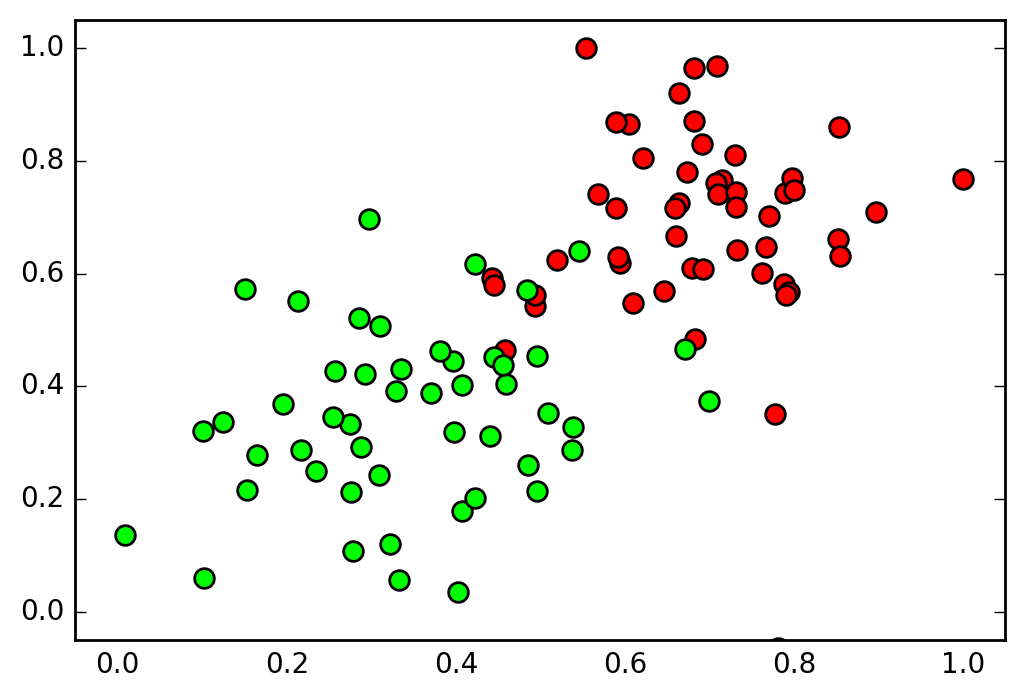

In [3]:
# use the plotting function to visualize our data
X,y = load_pts('files/2class_overlap.csv')

### Algorithm 1: linear Support Vector Machine

Now lets learn a nonlinear classifier to distinguish between the two classes.  For this task there are many choices (as discussed in the nanodegree intro video), and in this demonstration notebook we will examine: Support Vector Machines, and neural networks, and decision trees.  You will learn much more about these algorithms throughout the Machine Learning Nanodegree program!

For our first demonstration we will use a linear Support Vector Machine (SVM) model - a model that seeks to find the best line to separate the two classes of data. 

In what follows will get to play around with the value of the SVM parameter 'C' to find a line that gives a good fit to the dataset.  The following Python cell contains a function for running the SVM  algorithm and with a wide array of choices for this parameter.

In [4]:
# a general purpose function for running and plotting the result of a user-defined input classification algorithm
def browse_vals(X,y,clf,param_name,slider_min,slider_max,slider_start):
    def show_fit(parameter_value):
        # set parameter value of classifier
        exec 'clf.' + param_name + ' = ' +  str(parameter_value) in locals(),globals()

        # fit classifier
        clf.fit(X,y)

        # plot our points
        red = [0.25,1,0.5]    # custom color for plotting purposes
        green = [1,0.3,0.3]   # custom color for plotting purposes
        plt.scatter(X[np.argwhere(y==0).flatten(),0],X[np.argwhere(y==0).flatten(),1],s = 50, color = green, edgecolor = 'k')
        plt.scatter(X[np.argwhere(y==1).flatten(),0],X[np.argwhere(y==1).flatten(),1],s = 50, color = red, edgecolor = 'k')

        # dress panel correctly with axis labels etc.
        plt.xlim(-0.05,1.05)
        plt.ylim(-0.05,1.05)
        plt.grid(False)
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off')         # ticks along the top edge are off

        # plot classification boundary and color regions appropriately
        r = np.linspace(-0.1,1.1,300)
        s,t = np.meshgrid(r,r)
        s = np.reshape(s,(np.size(s),1))
        t = np.reshape(t,(np.size(t),1))
        h = np.concatenate((s,t),1)

        # use classifier to make predictions
        z = clf.predict(h)

        # reshape predictions for plotting
        s.shape = (np.size(r),np.size(r))
        t.shape = (np.size(r),np.size(r))
        z.shape = (np.size(r),np.size(r))

        # show the filled in predicted-regions of the plane 
        plt.contourf(s,t,z,colors = [green,red],alpha = 0.2,levels = range(-1,2))

        # show the classification boundary if it exists
        if len(np.unique(z)) > 1:
            plt.contour(s,t,z,colors = 'k',linewidths = 2)
    
    interact(show_fit, parameter_value=widgets.IntSlider(min=slider_min,max=slider_max,step=1,value=slider_start))

Once this function is run a simple slider mechanism will pop up that allows you to define the 'C' parameter yourself.  Once the slider is placed in a given position the function in the Python cell above trains a corresponding model - in this case an SVM - to the dataset.  

As you will by running the following Python cell, the default value for C set on the slider does not provide good results.  Try moving the slider around to see if you can find an ideal value for C.  

Note: here the classification boundary itself is drawn in black, while each region colored in light green and light red represent those points that the learned classifier predicts are of class green and red respectively.

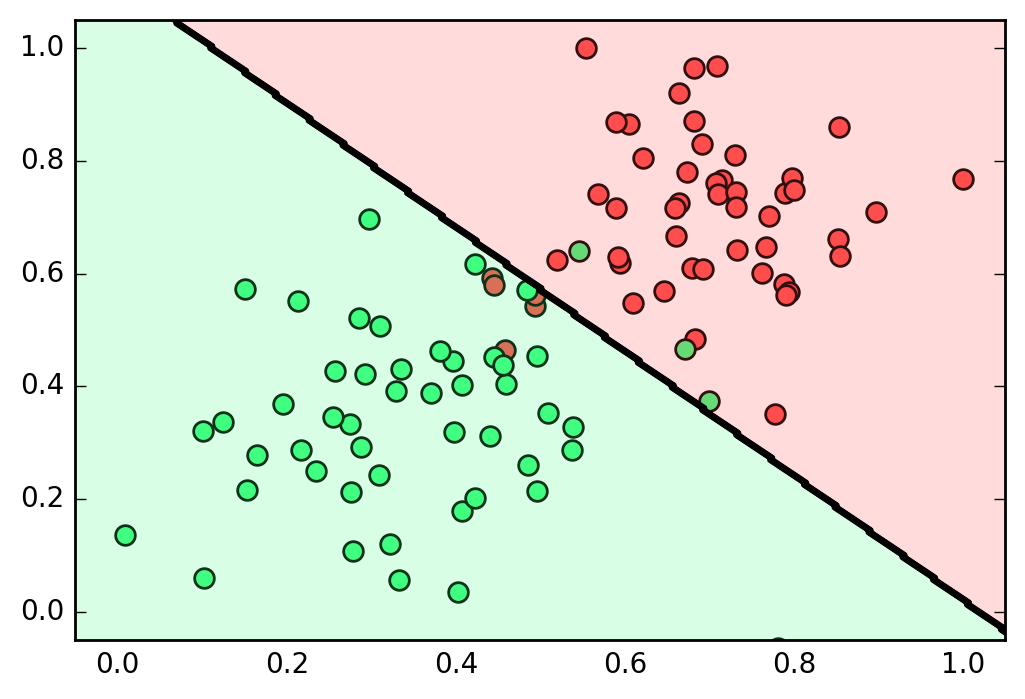

In [5]:
# create the linear SVM classifier and plug it into the previous Python function
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
browse_vals(X,y,clf,'C',slider_min = 1,slider_max = 10,slider_start = 1) 